In [1]:
import pandas as pd

In [2]:
# Load in the datasets.
sems = ["previous-schedules/Fall21.csv", "previous-schedules/Fall22.csv", "previous-schedules/Fall23.csv", "previous-schedules/Fall24.csv", "previous-schedules/Spring22.csv", "previous-schedules/Spring23.csv", "previous-schedules/Spring24.csv"]
dates = ["2021-8-1","2022-8-1","2023-8-1","2024-8-1","2022-1-1","2023-1-1","2024-1-1"]
dfs = []
for i, sem in enumerate(sems):
    print(sem, dates[i])
    df = pd.read_csv(sem)
    df['SEM_DATE'] = dates[i]
    dfs.append(df)

previous-schedules/Fall21.csv 2021-8-1
previous-schedules/Fall22.csv 2022-8-1
previous-schedules/Fall23.csv 2023-8-1
previous-schedules/Fall24.csv 2024-8-1
previous-schedules/Spring22.csv 2022-1-1
previous-schedules/Spring23.csv 2023-1-1
previous-schedules/Spring24.csv 2024-1-1


In [3]:
print(dfs[0].columns)
dfs[0]

Index(['Select', 'CRN', 'Subj', 'CrseNum', 'Section', 'CMP', 'Credits',
       'Title', 'Days', 'Time', 'Cap', 'Act', 'Rem', 'WL Cap', 'WL Act',
       'WL Rem', 'XL Cap', 'XL Act', 'XL Rem', 'Instructors', 'Date',
       'Location', 'Attributes', 'SEM_DATE'],
      dtype='object')


,Select,CRN,Subj,CrseNum,Section,CMP,Credits,Title,Days,Time,...,WL Act,WL Rem,XL Cap,XL Act,XL Rem,Instructors,Date,Location,Attributes,SEM_DATE
0,NR,80291,CSCI,101,A,C,3.0,INTRODUCTION TO COMPUTER SCIENCE,MWF,01:00pm-01:50pm,...,0,0,0,0,0,"Mackenzie Gayle Hull (P), Tracy K Camp, Megan ...",08/23-12/17,MZ 108,UG_Req,2021-8-1
1,C,80268,CSCI,101,B,C,3.0,INTRODUCTION TO COMPUTER SCIENCE,MWF,02:00pm-02:50pm,...,0,0,0,0,0,"Robert Haven Thompson (P), Tracy K Camp, Megan...",08/23-12/17,AH 330,UG_Req,2021-8-1
2,NR,80302,CSCI,101,C,C,3.0,INTRODUCTION TO COMPUTER SCIENCE,MWF,03:00pm-03:50pm,...,0,0,0,0,0,"Robert Haven Thompson (P), Tracy K Camp, Megan...",08/23-12/17,BE 243,UG_Req,2021-8-1
3,NR,80811,CSCI,101,D,C,3.0,INTRODUCTION TO COMPUTER SCIENCE,MWF,01:00pm-01:50pm,...,0,0,0,0,0,"Armando Eric Ocampo (P), Tracy K Camp, Megan K...",08/23-12/17,BB W210,UG_Req,2021-8-1
4,C,80960,CSCI,101,E,C,3.0,INTRODUCTION TO COMPUTER SCIENCE,MWF,02:00pm-02:50pm,...,0,0,0,0,0,"Megan Kinsley Shapiro (P), Tracy K Camp, Carte...",08/23-12/17,HH 202,UG_Req,2021-8-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NR,81291,CSCI,470,B,C,3.0,INTRODUCTION TO MACHINE LEARNING,TR,02:00pm-03:15pm,...,0,0,68,60,8,"Matthew Jay Roos (P), Wendy Denise Fisher",08/23-12/17,CO 219,UG_Req,2021-8-1
70,NR,81945,CSCI,470,OL,O,3.0,INTRODUCTION TO MACHINE LEARNING,AAA,00:00zm-00:00zm,...,0,0,50,43,7,Wendy Denise Fisher (P),10/20-12/15,AAA,No_Special_Notes,2021-8-1
71,NR,80755,CSCI,471,A,C,3.0,COMPUTER NETWORKS I,MWF,11:00am-11:50am,...,0,0,0,0,0,Phillip Richardson Romig (P),08/23-12/17,BB W250,UG_Req,2021-8-1
72,C,80842,CSCI,475,A,C,3.0,INFORMATION SECURITY AND PRIVACY,MWF,10:00am-10:50am,...,0,0,0,0,0,Phillip Richardson Romig (P),08/23-12/17,"AH 340,CT 231",UG_Req,2021-8-1


In [16]:
#Now add the timings to each dataframe I'm gonna be lazy and add an index

def get_specific_class_data(class_name):
    rdf = pd.DataFrame(columns = dfs[0].columns)
    for df in dfs:
        row = df[df['Title'] == class_name]
        rdf = pd.concat([rdf, row],ignore_index=True)

    return rdf

algo = get_specific_class_data("ALGORITHMS")

algo['Cap']

0    130
1    170
2    166
3    150
4     86
5     92
6    170
7    112
8    115
Name: Cap, dtype: object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2021-08-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Val     9 non-null      int64
dtypes: int64(1)
memory usage: 144.0 bytes
None


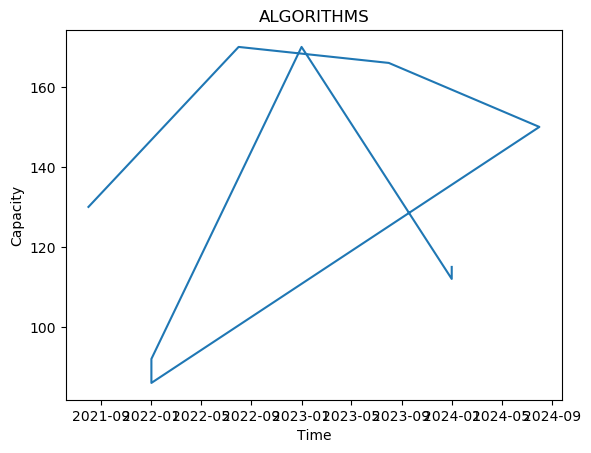

In [45]:
import matplotlib.pyplot as plt
def plot_class(class_name):
    df = get_specific_class_data(class_name)

    plotted_df = pd.DataFrame(columns=["Date", "Val"])
    plotted_df["Date"] = df["SEM_DATE"]
    plotted_df['Date']= pd.to_datetime(plotted_df['Date'])

    plotted_df["Val"] = df["Cap"]
    plotted_df["Val"] = plotted_df["Val"].astype(int)
    plotted_df.set_index(['Date'],inplace=True)

    plt.xlabel('Time')
    plt.ylabel('Capacity')
    plt.title(class_name)
    plt.plot(plotted_df)

    print(plotted_df.info())
    

    plt.show()


plot_class("ALGORITHMS")
